# Air absorption coefficients

In [1]:
import dynamic_sound as ds
import numpy as np
import os
from scipy.signal import firwin2, freqz
import matplotlib.pyplot as plt
from dynamic_sound.acoustics.standards.ISO_9613_1_1993 import saturation_pressure, molar_concentration_water_vapour, relaxation_frequency_oxygen, relaxation_frequency_nitrogen, attenuation_coefficients
from dynamic_sound.acoustics.standards.ISO_9613_1_1993 import REFERENCE_PRESSURE, REFERENCE_TEMPERATURE, TRIPLE_TEMPERATURE

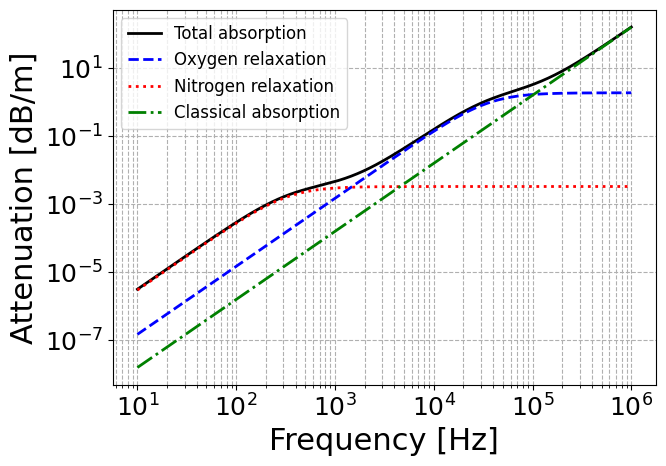

In [4]:
SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


f = np.logspace(1, 6, 500)

temperature = 20+273.15
relative_humidity = 50
pressure = 101.325
Psat = saturation_pressure(temperature=temperature)
h = molar_concentration_water_vapour(relative_humidity=relative_humidity, saturation_pressure=Psat, pressure=pressure)
frO = relaxation_frequency_oxygen(pressure=pressure, h=h)
frN = relaxation_frequency_nitrogen(pressure, temperature, h)
alpha_coeff = attenuation_coefficients(frequency=f, temperature=temperature, pressure=pressure, relative_humidity=relative_humidity)
alpha_C = 8.686 * f**2 * (1.84e-11 * (pressure / REFERENCE_PRESSURE)**(-1) * (temperature / REFERENCE_TEMPERATURE)**0.5)
alpha_O = 8.686 * f**2 * (temperature / REFERENCE_TEMPERATURE)**(-5.0/2.0) * (0.01275 * np.exp(-2239.1 / temperature) / (frO + (f**2 / frO)))
alpha_N = 8.686 * f**2 * (temperature / REFERENCE_TEMPERATURE)**(-5.0/2.0) * (0.1068 * np.exp(-3352.0 / temperature) / (frN + (f**2 / frN)))

plt.figure(figsize=(7, 5))
plt.loglog(f, alpha_coeff, 'k', label="Total absorption", linewidth=2)
plt.loglog(f, alpha_O, 'b', linestyle='--', linewidth=2, label="Oxygen relaxation")
plt.loglog(f, alpha_N, color='r', linestyle=':', linewidth=2, label="Nitrogen relaxation")
plt.loglog(f, alpha_C, color='g', linestyle='-.', linewidth=2, label="Classical absorption")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Attenuation [dB/m]")
#plt.title("ISO 9613-1 Molecular Absorption in Air")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.savefig("_tmp/iso_9613_1_attenuation_components.png", dpi=300)
plt.show()

In [5]:
temp = [-20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
freq = np.array([50, 63, 80, 100, 125, 160, 200, 250, 315, 400, 500, 630, 800, 1000, 1250, 1600, 2000, 2500, 3150, 4000, 5000, 6300, 8000, 10000])
humidity = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
pressure = 101.325

distance = 1000
alpha_coeff = 10**(-alpha_coeff * distance / 20)

for temp_i in temp:
    print("----------------------------------")
    print(f"Temperature: {temp_i} °C")
    temp_i = temp_i+273.15
    print("Humidity (%) |", end="")

    for hum_i in humidity:
        print(f"{hum_i:10.0f} |", end="")
         
    for freq_i in freq:
        print(f"\n{freq_i:12.0f} |", end="")
        for hum_i in humidity:
            val = attenuation_coefficients(frequency=freq_i, temperature=temp_i, pressure=pressure, relative_humidity=hum_i)
            print(f"{val*1000:10.2e} |", end="")
    
    print()

----------------------------------
Temperature: -20 °C
Humidity (%) |        10 |        20 |        30 |        40 |        50 |        60 |        70 |        80 |        90 |       100 |
          50 |  5.87e-01 |  4.17e-01 |  2.84e-01 |  2.10e-01 |  1.67e-01 |  1.42e-01 |  1.25e-01 |  1.13e-01 |  1.05e-01 |  9.89e-02 |
          63 |  7.55e-01 |  6.01e-01 |  4.20e-01 |  3.07e-01 |  2.41e-01 |  1.99e-01 |  1.73e-01 |  1.55e-01 |  1.42e-01 |  1.33e-01 |
          80 |  9.29e-01 |  8.55e-01 |  6.27e-01 |  4.61e-01 |  3.56e-01 |  2.90e-01 |  2.46e-01 |  2.16e-01 |  1.96e-01 |  1.80e-01 |
         100 |  1.08e+00 |  1.15e+00 |  9.02e-01 |  6.75e-01 |  5.21e-01 |  4.19e-01 |  3.50e-01 |  3.03e-01 |  2.69e-01 |  2.45e-01 |
         125 |  1.20e+00 |  1.48e+00 |  1.27e+00 |  9.86e-01 |  7.67e-01 |  6.14e-01 |  5.08e-01 |  4.33e-01 |  3.80e-01 |  3.40e-01 |
         160 |  1.31e+00 |  1.85e+00 |  1.79e+00 |  1.48e+00 |  1.17e+00 |  9.46e-01 |  7.79e-01 |  6.59e-01 |  5.70e-01 |  5.03e-01 |
